In [182]:
from collections import Counter

In [130]:
import music21 as m21

from music21 import *


In [152]:
piece = m21.converter.parse("./roman.xml")
vocal = piece.parts[0]

In [153]:
vocal.notes.stream().show("text")
#vocalnotes.show("text")
print("hoge")
vocal.show("text")


hoge
{0.0} <music21.instrument.Instrument P1: Synth Pad: Microsoft GS Wavetable Synth>
{0.0} <music21.stream.Measure 1 offset=0.0>
    {0.0} <music21.layout.SystemLayout>
    {0.0} <music21.clef.TrebleClef>
    {0.0} <music21.tempo.MetronomeMark allegro Quarter=132.0>
    {0.0} <music21.key.KeySignature of 5 sharps>
    {0.0} <music21.meter.TimeSignature 4/4>
    {0.0} <music21.note.Rest rest>
    {2.0} <music21.note.Note D#>
    {2.5} <music21.note.Note E>
    {3.0} <music21.note.Note F#>
    {3.5} <music21.note.Note F#>
{4.0} <music21.stream.Measure 2 offset=4.0>
    {0.0} <music21.note.Note F#>
    {0.5} <music21.note.Note F#>
    {1.0} <music21.note.Note F#>
    {1.5} <music21.note.Note F#>
    {2.0} <music21.note.Note G#>
    {3.0} <music21.note.Note F#>
    {3.5} <music21.note.Note F#>
{8.0} <music21.stream.Measure 3 offset=8.0>
    {0.0} <music21.note.Note B>
    {0.5} <music21.note.Note B>
    {1.0} <music21.note.Rest rest>
    {1.5} <music21.note.Note B>
    {2.0} <music21.no

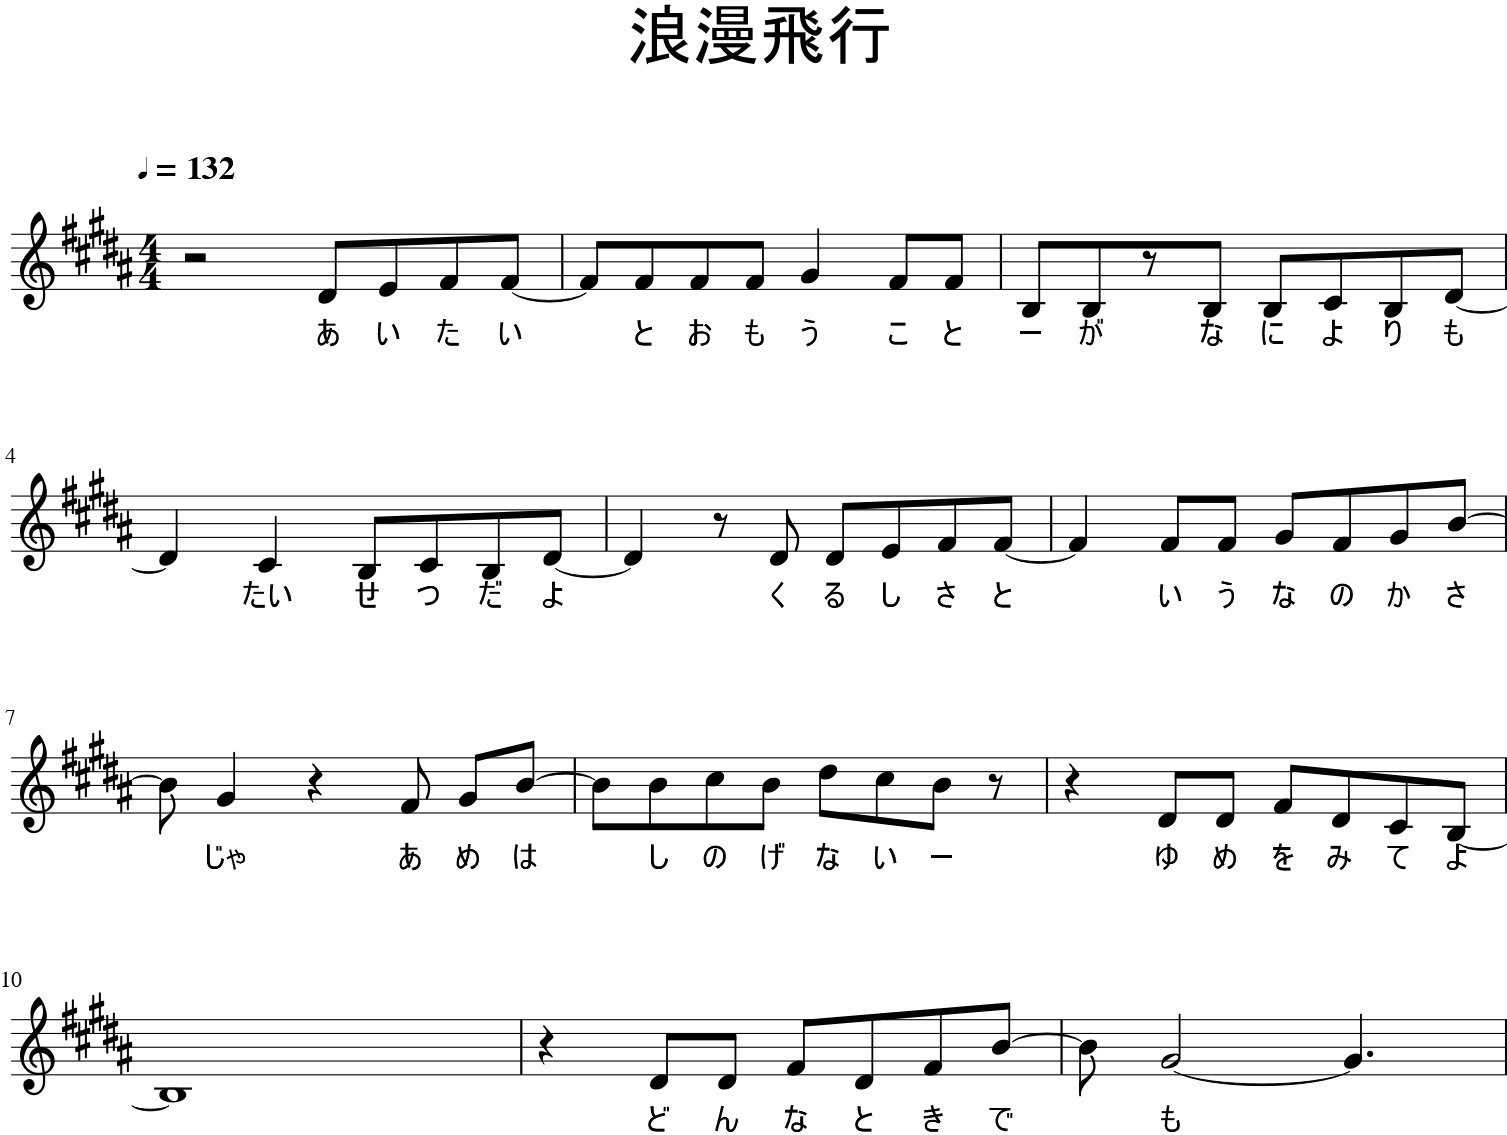

In [158]:
piece.parts[0].show()

In [208]:
"""
音価・音高のペアのオブジェクトを楽譜から作る
タイの部分→連結

"""



record = []
checker = False
#タイがついた場合の途中記録用
pitch_tmp = 0.0
duration_tmp = 0.0
for i in vocal.flat.notesAndRests.stream():
    
    #タイがついている
    if i.tie:
        #タイのはじめの音ならまず音高を記録する
        if checker == False:
            if i.isNote == True:
                #record.append([i.pitch.ps,i.duration.quarterLength])
                pitch_tmp = i.pitch.ps
                duration_tmp += i.duration.quarterLength
            elif i.isRest == True:
                #record.append(["rest",i.duration.quarterLength])
                pitch_tmp = 0.0
                duration_tmp += i.duration.quarterLength
                
        #タイの途中の音なら音長を足していく      
        else:
            duration_tmp += i.duration.quarterLength
            
        #タイはついている   
        checker = True
        
    #タイがついてない    
    else:
        checker = False
        #直前がタイの最後の音ならタイでつながって一音になった音を追加
        if not duration_tmp == 0.0:
            record.append([pitch_tmp,duration_tmp])
            duration_tmp = 0.0
            
        #そうでなければ普通に追加
        if i.isNote == True:
            record.append([i.pitch.ps,i.duration.quarterLength])
        elif i.isRest == True:
            record.append([0.0,i.duration.quarterLength])

print(record)

[[0.0, 2.0], [63.0, 0.5], [64.0, 0.5], [66.0, 0.5], [66.0, 1.0], [66.0, 0.5], [66.0, 0.5], [66.0, 0.5], [68.0, 1.0], [66.0, 0.5], [66.0, 0.5], [59.0, 0.5], [59.0, 0.5], [0.0, 0.5], [59.0, 0.5], [59.0, 0.5], [61.0, 0.5], [59.0, 0.5], [63.0, 1.5], [61.0, 1.0], [59.0, 0.5], [61.0, 0.5], [59.0, 0.5], [63.0, 1.5], [0.0, 0.5], [63.0, 0.5], [63.0, 0.5], [64.0, 0.5], [66.0, 0.5], [66.0, 1.5], [66.0, 0.5], [66.0, 0.5], [68.0, 0.5], [66.0, 0.5], [68.0, 0.5], [71.0, 1.0], [68.0, 1.0], [0.0, 1.0], [66.0, 0.5], [68.0, 0.5], [71.0, 1.0], [71.0, 0.5], [73.0, 0.5], [71.0, 0.5], [75.0, 0.5], [73.0, 0.5], [71.0, 0.5], [0.0, 0.5], [0.0, 1.0], [63.0, 0.5], [63.0, 0.5], [66.0, 0.5], [63.0, 0.5], [61.0, 0.5], [59.0, 4.5], [0.0, 1.0], [63.0, 0.5], [63.0, 0.5], [66.0, 0.5], [63.0, 0.5], [66.0, 0.5], [71.0, 4.5], [0.0, 1.0], [63.0, 0.5], [63.0, 0.5], [66.0, 0.5], [63.0, 0.5], [66.0, 0.5], [71.0, 1.0], [71.0, 0.5], [70.0, 0.5], [68.0, 1.0], [66.0, 0.5], [68.0, 0.5], [68.0, 3.0], [70.0, 0.5], [68.0, 0.5], [66.0,

### 以下関係ないテストコード群


In [105]:
def make_bigram(list_of_notes):
    

TypeError: getElementsByClass() missing 1 required positional argument: 'classFilterList'

In [77]:
for n in vocal.notesAndRests:
    print(n)

In [133]:
p1 = stream.Part()
k1 = key.KeySignature(0) # key of C
n1 = note.Note('B')
r1 = note.Rest()
c1 = chord.Chord(['A', 'B-'])
p1.append([k1, n1, r1, c1])
p1.show('text')

{0.0} <music21.key.KeySignature of no sharps or flats>
{0.0} <music21.note.Note B>
{1.0} <music21.note.Rest rest>
{2.0} <music21.chord.Chord A B->


In [140]:
noteStream = p1.notes.stream()
noteStream?
noteStream.show('text')

{0.0} <music21.note.Note B>
{2.0} <music21.chord.Chord A B->
